In [12]:
import pandas as pd
import os
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
monthtonum = {u'января' : 1, u'февраля' : 2, u'марта' : 3, u'апреля' : 4, u'мая' : 5, u'июня' : 6, u'июля' : 7, u'августа' : 8, u'сентября' : 9, u'октября' : 10, u'ноября' : 11, u'декабря' : 12}
def prepareDSs(lst):
    for dset in lst:
        dset['ID'] = range(dset.shape[0])
        dset.dropna(axis=0, how='any', inplace=True)
        dset.Rating = dset.Rating.str.replace(u',', u'.')
        dset.Rating = dset.Rating.str.replace(u' ', u'')
        dset.drop(dset[dset['Rating'] == "NaN"].index, inplace=True)
        dset.Rating = pd.to_numeric(dset.Rating)
        dset.Price = dset.Price.str.replace(u' ', u'')
        dset.Price = dset.Price.str.strip()
        dset.Price = pd.to_numeric(dset.Price)
        dset.Mileage = RWSvect(dset.Mileage)
        dset.Mileage = dset.Mileage.str.strip()
        dset.Mileage = pd.to_numeric(dset.Mileage)
        dset.Power = RWSvect(dset.Power)
        dset.Power = dset.Power.str.strip()
        dset.Power = pd.to_numeric(dset.Power)
        dset.Racing = RWSvect(dset.Racing)
        dset.Racing = dset.Racing.str.strip()
        dset.Racing = pd.to_numeric(dset.Racing)
        dset.iloc[:, 5] = dTrvect(dset.iloc[:, 5].values)
        dset.iloc[:, 5] = np.array(dset.iloc[:, 5].str.split('.'))
        dset.drop(dset[dset['Date'] == False].index, inplace=True)
        dset.dropna(axis=0, how='any', inplace=True)
        datedset = pd.DataFrame(dset.iloc[:, 5].values.tolist(), columns=['dateDay', 'dateMonth', 'dateYear'])
        dset['dateDay'] = pd.to_numeric(datedset['dateDay'])
        dset['dateMonth'] = pd.to_numeric(datedset['dateMonth'])
        dset['dateYear'] = pd.to_numeric(datedset['dateYear'])
        dset['Year'] = pd.to_numeric(dset['Year'])
        dset['Age'] = dset['dateYear'] - dset['Year']

def removeWS(string):
    forbidden = [9, 10, 11, 12, 13, 32, 133, 160, 5760, 8192, 1053, 1086, 1042, 1074, 1089, 1083, 46]
    if isinstance(string, unicode):
        ret = [i for i in string if ord(i) not in forbidden]
        if not ret:
            return 0
        ret = u''.join(ret)
        return ret
    elif isinstance(string, str):
        ret = string.replace(' ', '')
        print(ret)
        return ret
    else:
        print("not a string:'%s'" % string)
        return False

def dateTransform(string):
    if isinstance(string, unicode):
        wrds = string.split(' ')[1:]
        if not wrds:
            print(string)
            return False
        if wrds[0] == u'':
            return False
        day = int(wrds[0])
        month = monthtonum[wrds[1]]
        year = 2018
        if (len(wrds) == 3):
            year = int(wrds[2])
        return "%d.%d.%d" % (day, month, year)
    elif isinstance(string, str):
        wrds = string.split(' ')[1:]
        if len(wrds) == 0:
            wrds = stsring.split('.')
            print(wrds)
        if wrds[0] == u'':
            return False
        day = int(wrds[0])
        month = monthtonum[wrds[1]]
        year = 2018
        if (len(wrds) == 3):
            year = int(wrds[2])
        return "%d.%d.%d" % (day, month, year)
    else:
        print("not a string:'%s'" % string)
        return False

def encodeCat(dset, colname):
    vals = np.unique(dset[colname])
    for enc, val in enumerate(vals):
        dset[colname][dset[colname] == val] = enc
    dset[colname] = pd.to_numeric(dset[colname])
    return vals

RWSvect = np.vectorize(removeWS)
dTrvect = np.vectorize(dateTransform)

In [3]:
header=['Model', 'Year', 'Price', 'Mileage', 'Region', 'Date', 'Rating', 'Eng_capacity', 'Power', 'Gearing', 'Eng_type', 'Fuel_type', 'Transmission', 'Racing', 'Country', 'Doors_num', 'Seats_num', 'Length', 'Width', 'Height', 'Wheelbase', 'Trunk_capacity', 'Full_mass', 'Gearing_dup', 'Gearing_num', 'Transmission_dup', 'Front_susp', 'Back_susp', 'Front_brakes', 'Back_brakes', 'Speed', 'Racing_dup', 'Fuel_type_dup', 'Eng_placing', 'Eng_capacity_dup', 'Boost_type', 'Power_dup', 'Torque', 'Cyl_placing', 'Cyl_num', 'Valve_per_cyl', 'Eng_supply', 'Compression_rate', 'Cyl_geom']
alltables = os.listdir('./data')
ds = pd.read_csv('./data/%s' % alltables[0], encoding='utf-8', sep=';', header=None, names=header)
ds = ds.iloc[2:, :]
for tbl in alltables[1:]:
    dstmp = pd.read_csv('./data/%s' % tbl, encoding='utf-8', sep=';', header=None, names=header)
    dstmp = dstmp.iloc[2:, :]
    ds = pd.concat([ds, dstmp])
prepareDSs([ds])
print(ds.shape)
print(ds.columns)
ds.head()

(14316, 49)
Index([u'Model', u'Year', u'Price', u'Mileage', u'Region', u'Date', u'Rating',
       u'Eng_capacity', u'Power', u'Gearing', u'Eng_type', u'Fuel_type',
       u'Transmission', u'Racing', u'Country', u'Doors_num', u'Seats_num',
       u'Length', u'Width', u'Height', u'Wheelbase', u'Trunk_capacity',
       u'Full_mass', u'Gearing_dup', u'Gearing_num', u'Transmission_dup',
       u'Front_susp', u'Back_susp', u'Front_brakes', u'Back_brakes', u'Speed',
       u'Racing_dup', u'Fuel_type_dup', u'Eng_placing', u'Eng_capacity_dup',
       u'Boost_type', u'Power_dup', u'Torque', u'Cyl_placing', u'Cyl_num',
       u'Valve_per_cyl', u'Eng_supply', u'Compression_rate', u'Cyl_geom',
       u'ID', u'dateDay', u'dateMonth', u'dateYear', u'Age'],
      dtype='object')


,Model,Year,Price,Mileage,Region,Date,Rating,Eng_capacity,Power,Gearing,...,Cyl_num,Valve_per_cyl,Eng_supply,Compression_rate,Cyl_geom,ID,dateDay,dateMonth,dateYear,Age
2.0,Alfa Romeo 156 I,1998,120000,238000,Москва\n,"[23, 4, 2018]",4.2,1.8 л,144,механика,...,4,4,распределенный впрыск (многоточечный),10.3,82 × 82.7,60,22,4,2018,20
4.0,Alfa Romeo 156 I,1999,183000,260000,Москва\n,"[23, 4, 2018]",4.2,1.9 л,105,механика,...,4,2,двигатель с неразделенными камерами сгорания ...,18.5,82 × 90.4,62,13,4,2018,19
5.0,Alfa Romeo Giulietta III,2014,1200000,62000,Москва\n,"[22, 4, 2018]",3.9,1.4 л,170,робот,...,4,4,распределенный впрыск (многоточечный),10,72 × 84,63,22,4,2018,4
7.0,Alfa Romeo 156 I,2000,135000,189000,Екатеринбург\n,"[23, 4, 2018]",4.2,1.6 л,120,механика,...,4,4,распределенный впрыск (многоточечный),10.3,82 × 72.65,65,21,4,2018,18
8.0,Alfa Romeo 156 I Рестайлинг 2,2004,349000,117000,Нижний Новгород\n,"[13, 4, 2018]",4.3,2.0 л,150,механика,...,4,4,распределенный впрыск (многоточечный),10,83 × 91,66,25,2,2018,14


In [4]:
models = encodeCat(ds, 'Model')
regions = encodeCat(ds, 'Region')
gearing = encodeCat(ds, 'Gearing')
eng_supply = encodeCat(ds, 'Eng_supply')
fuel_type = encodeCat(ds, 'Fuel_type')
transmission = encodeCat(ds, 'Transmission')
country = encodeCat(ds, 'Country')
gearing_dup = encodeCat(ds, 'Gearing_dup')
transmission_dup = encodeCat(ds, 'Transmission_dup')
front_susp = encodeCat(ds, 'Front_susp')
back_susp = encodeCat(ds, 'Back_susp')
front_brakes = encodeCat(ds, 'Front_brakes')
back_brakes = encodeCat(ds, 'Back_brakes')
fuel_type_dup = encodeCat(ds, 'Fuel_type_dup')
eng_placing = encodeCat(ds, 'Eng_placing')
boos_type = encodeCat(ds, 'Boost_type')
cyl_placing = encodeCat(ds, 'Cyl_placing')
eng_supply = encodeCat(ds, 'Eng_supply')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
ds.head()

,Model,Year,Price,Mileage,Region,Date,Rating,Eng_capacity,Power,Gearing,...,Cyl_num,Valve_per_cyl,Eng_supply,Compression_rate,Cyl_geom,ID,dateDay,dateMonth,dateYear,Age
2.0,8,1998,120000,238000,313,"[23, 4, 2018]",4.2,1.8 л,144,1,...,4,4,4,10.3,82 × 82.7,60,22,4,2018,20
4.0,8,1999,183000,260000,313,"[23, 4, 2018]",4.2,1.9 л,105,1,...,4,2,0,18.5,82 × 90.4,62,13,4,2018,19
5.0,14,2014,1200000,62000,313,"[22, 4, 2018]",3.9,1.4 л,170,2,...,4,4,4,10,72 × 84,63,22,4,2018,4
7.0,8,2000,135000,189000,135,"[23, 4, 2018]",4.2,1.6 л,120,1,...,4,4,4,10.3,82 × 72.65,65,21,4,2018,18
8.0,9,2004,349000,117000,340,"[13, 4, 2018]",4.3,2.0 л,150,1,...,4,4,4,10,83 × 91,66,25,2,2018,14


In [6]:
ds.corr()['Price'].sort_values()

Cyl_placing        -0.388777
Age                -0.330482
Mileage            -0.300967
Eng_supply         -0.206654
Front_susp         -0.206304
Back_susp          -0.196590
Gearing_dup        -0.180071
Gearing            -0.180071
Racing             -0.141588
Country            -0.137042
Model              -0.119922
ID                 -0.054348
dateYear            0.001227
dateMonth           0.007385
dateDay             0.009357
Region              0.012039
Front_brakes        0.243910
Rating              0.246011
Transmission_dup    0.302680
Transmission        0.302680
Fuel_type           0.307415
Fuel_type_dup       0.307415
Boost_type          0.310822
Year                0.330709
Eng_placing         0.354575
Back_brakes         0.476102
Power               0.646898
Price               1.000000
Name: Price, dtype: float64

In [7]:
fout = open("./encoded_dataset.tmp", "w")
np.save(fout, ds.values)
fout.close()

In [9]:
learnds_X = ds.iloc[:, [0, 3, 8, 48]]
learnds_y = ds.iloc[:, 2]
learnds_X.head()

,Model,Mileage,Power,Age
2.0,8,238000,144,20
4.0,8,260000,105,19
5.0,14,62000,170,4
7.0,8,189000,120,18
8.0,9,117000,150,14


In [10]:
X_train, X_test, y_train, y_test = train_test_split(learnds_X, learnds_y, test_size=0.2, random_state=46)

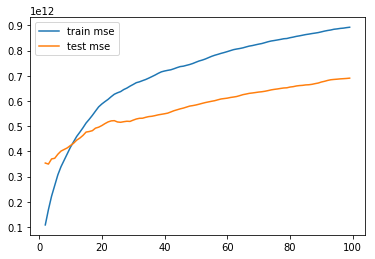

In [42]:
neighbors = range(2, 100)
errors_train = []
errors_test = []
for i in neighbors:
    knnmodel = KNeighborsRegressor(i)
    knnmodel.fit(X_train, y_train)
    y_pred = knnmodel.predict(X_train)
    errors_train.append(mean_squared_error(y_train, y_pred))
    y_pred = knnmodel.predict(X_test)
    errors_test.append(mean_squared_error(y_test, y_pred))
fig = plt.figure()
plt.plot(neighbors, errors_train, label="train mse")
plt.plot(neighbors, errors_test, label="test mse")
plt.legend()

min error is 63472983706.218903, depth is 62


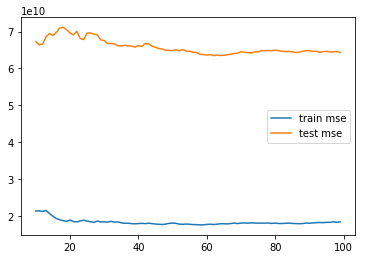

In [17]:
tr_errors = []
ts_errors = []
estimators = range(10, 100)
for i in estimators:
    regr = RandomForestRegressor(max_depth=14, random_state=0, n_estimators=i)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_train)
    tr_errors.append(mean_squared_error(y_train, y_pred))
    y_pred = regr.predict(X_test)
    ts_errors.append(mean_squared_error(y_test, y_pred))
fig = plt.figure()
plt.plot(estimators, tr_errors, label="train mse")
plt.plot(estimators, ts_errors, label="test mse")
plt.legend()
print("min error is %lf, n_estimators is %d" % (ts_errors[np.argsort(ts_errors)[0]], estimators[np.argsort(ts_errors)[0]]))